# 차량파손 데이터 EDA

In [2]:
import os
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageDraw
from PIL import Image
import cv2

root_dir = os.path.dirname(os.getcwd())
root_dir

## 파손 차량 이미지

### 샘플 보기

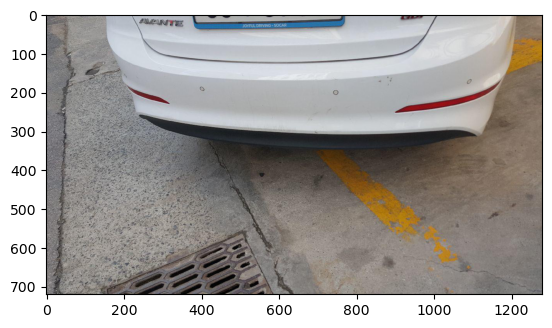

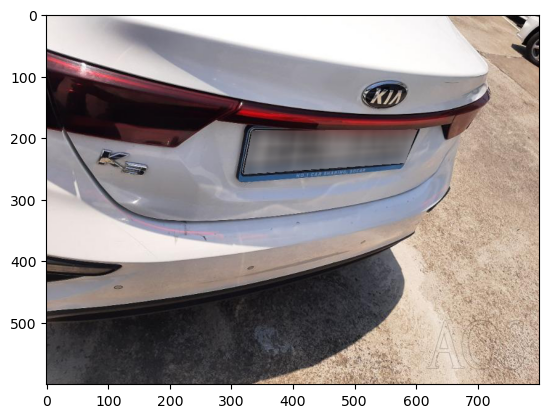

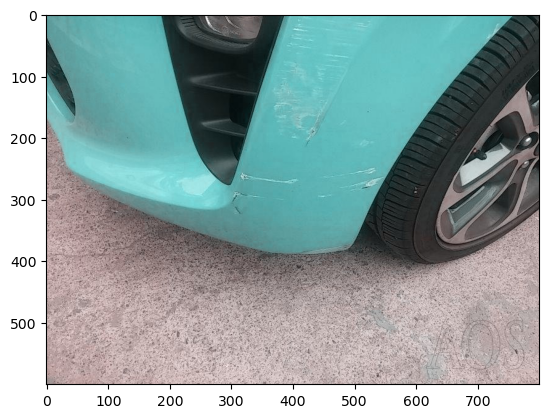

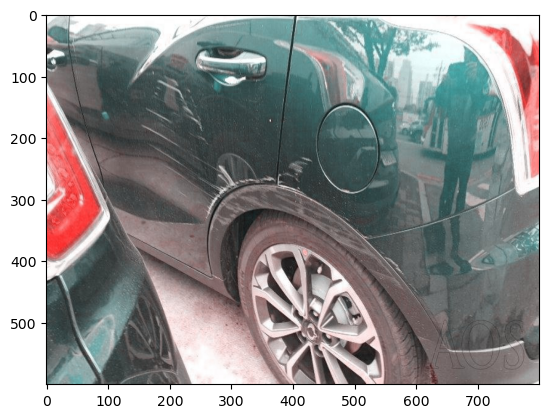

In [6]:
damage_imgs = glob(os.path.join(root_dir, 'data/Dataset/1.원천데이터/damage/*.jpg'))
sample_imgs = damage_imgs[:4]

for img in sample_imgs:
    image_pil = Image.open(img)
    image = np.array(image_pil)
    
    plt.imshow(image)
    plt.grid(False)
    plt.show()

### label 미리보기

In [30]:
sample_labels = []
for img in sample_imgs:
    with open(img.replace('1.원천데이터', '2.라벨링데이터').replace('jpg', 'json')) as f:
        sample_label = json.load(f)
    sample_labels.append(sample_label)

sample_labels

[{'info': {'name': 'socar', 'date_created': '03/08/2022'},
  'images': {'id': 1,
   'width': 1280,
   'height': 720,
   'file_name': '0125554_sc-146571.jpg'},
  'annotations': [{'id': 2,
    'image_id': 1,
    'category_id': 'sc-146571',
    'segmentation': [[[[861, 180],
       [854, 169],
       [863, 165],
       [894, 152],
       [902, 170],
       [885, 190],
       [861, 180]]]],
    'area': 1017.0,
    'bbox': [854, 152, 48, 38],
    'damage': 'Scratched',
    'part': None,
    'year': 2016,
    'color': 'White',
    'level': None,
    'repair': ['Rear bumper:exchange,coating']},
   {'id': 3,
    'image_id': 1,
    'category_id': 'sc-146571',
    'segmentation': [[[[688, 306],
       [694, 298],
       [710, 300],
       [705, 308],
       [688, 306]]]],
    'area': 143.0,
    'bbox': [688, 298, 22, 10],
    'damage': 'Scratched',
    'part': None,
    'year': 2016,
    'color': 'White',
    'level': None,
    'repair': ['Rear bumper:exchange,coating']}],
  'categories': {'id':

### annotation 확인

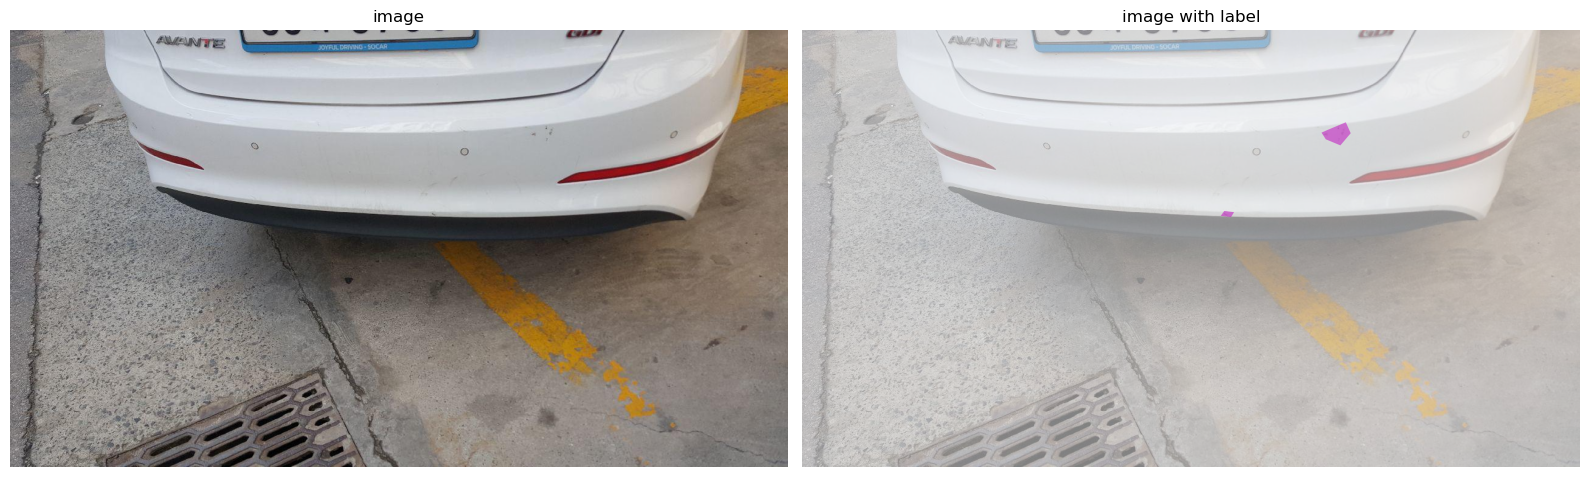

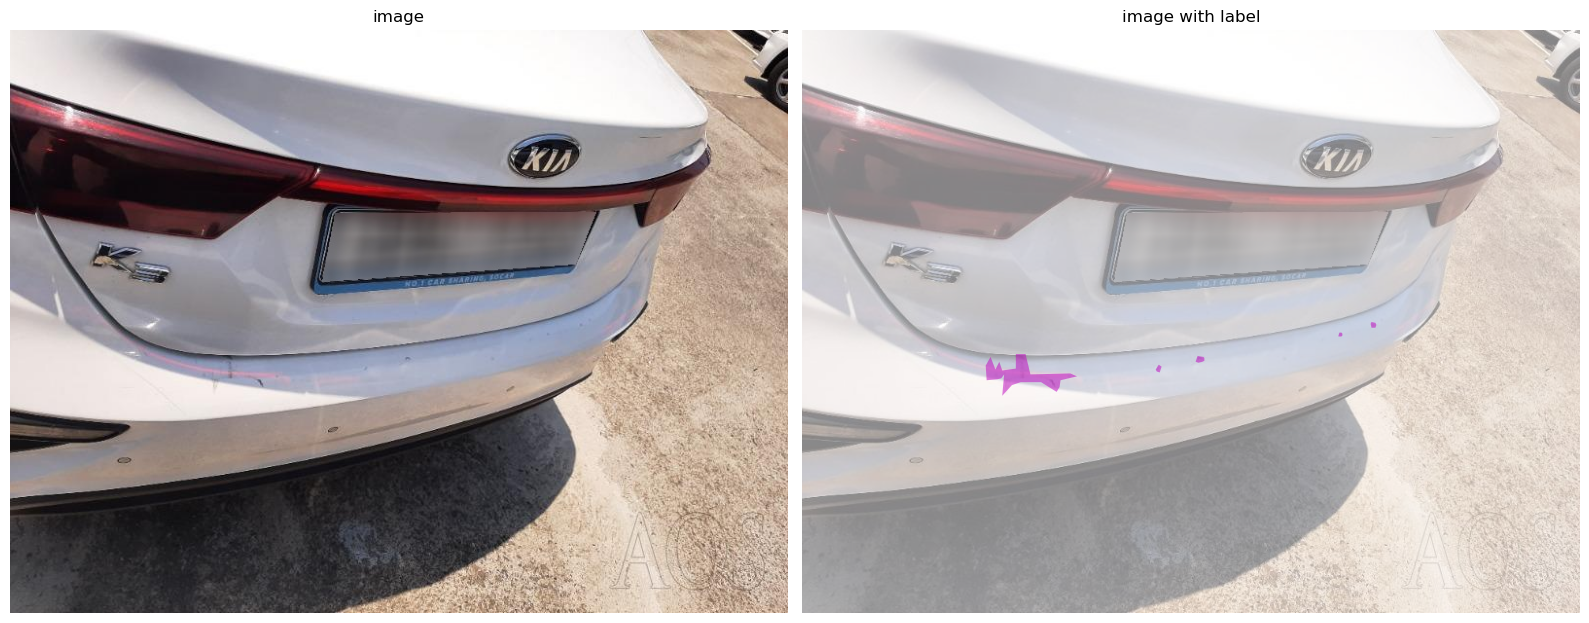

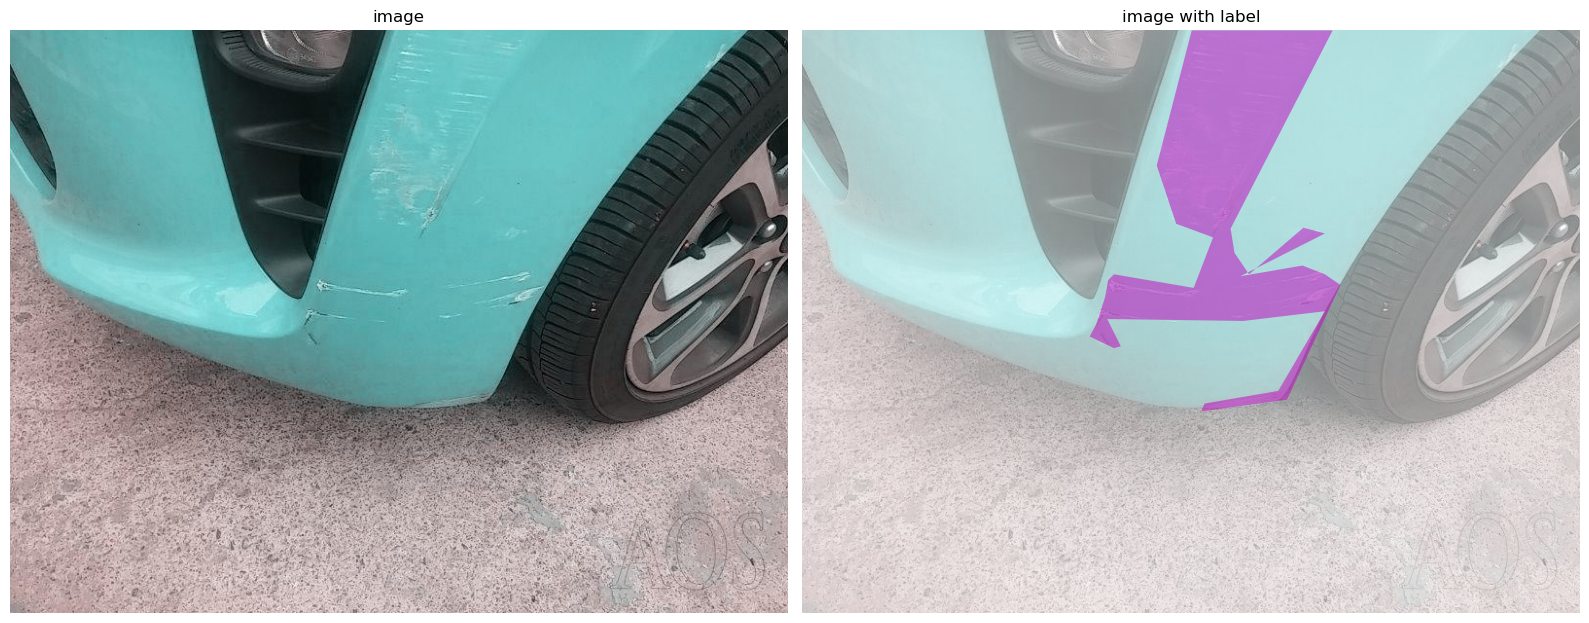

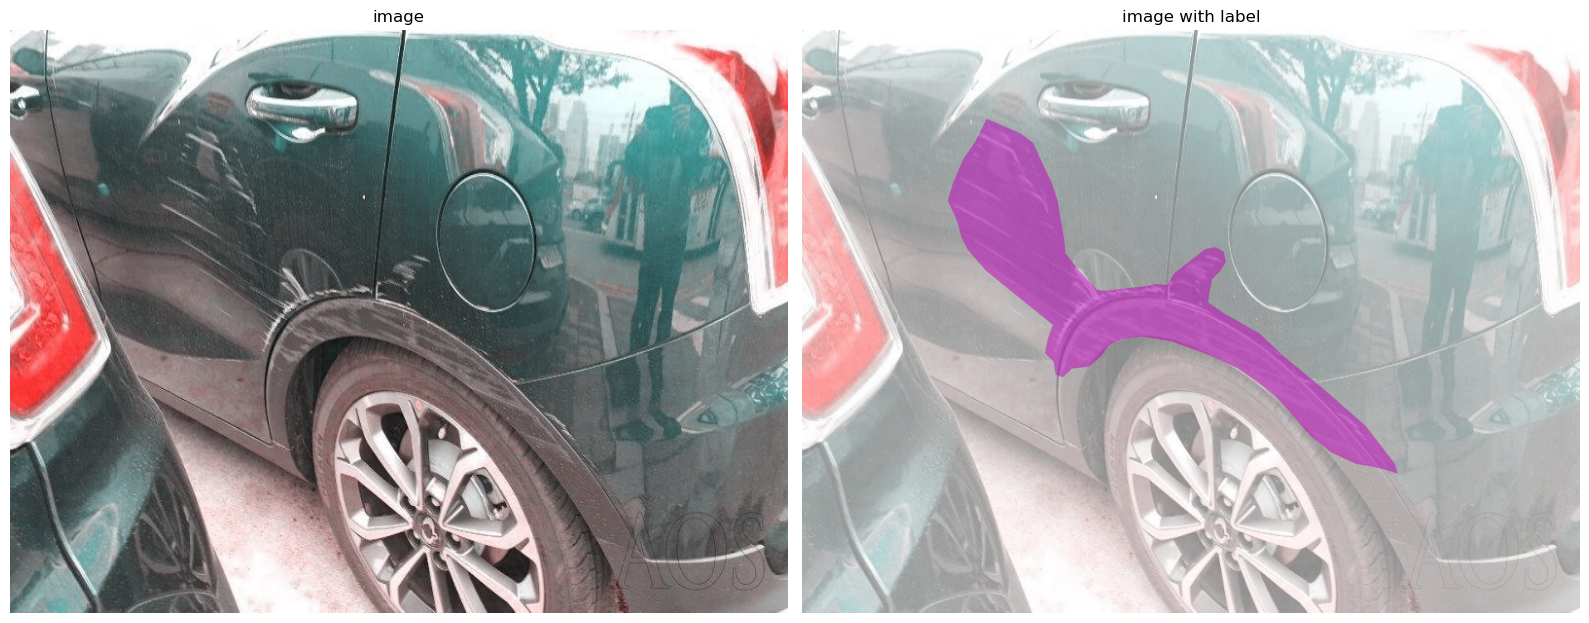

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

for i, sample_img in enumerate(sample_imgs): 
    img = cv2.imread(sample_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    segs = []
    for anno in sample_labels[i]['annotations']:
        seg = anno['segmentation'][0][0]
        segs.append(seg)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

    ax[0].imshow(img)
    ax[0].set_title('image')
    ax[0].axis('off')

    ax[1].imshow(img.astype('uint8'), alpha=0.5)

    for seg in segs:
        p = Polygon(np.array(seg), facecolor='m', alpha=0.5)
        ax[1].add_patch(p)
        
    ax[1].set_title('image with label')
    ax[1].axis('off')

    fig.set_tight_layout(True)
    plt.show()

## 라벨링 데이터

In [ ]:
damage_labels = glob(os.path.join(root_dir, 'data/Dataset/2.라벨링데이터/damage/*.json'))
damage_part_labels = glob(os.path.join(root_dir, 'data/Dataset/2.라벨링데이터/damage_part/*.json'))

len(damage_labels), len(damage_part_labels)

(403559, 109062)

### 라벨링 샘플 확인

In [15]:
with open(damage_labels[0]) as f:
    damage_label_json = json.load(f)
damage_label_json

{'info': {'name': 'external', 'date_created': '03/08/2022'},
 'images': {'id': 1,
  'width': 800,
  'height': 601,
  'file_name': '0281666_as-3065560.jpg'},
 'annotations': [{'id': 2,
   'image_id': 1,
   'category_id': 'as-3065560',
   'segmentation': [[[[63, 365],
      [100, 352],
      [526, 281],
      [531, 299],
      [97, 396],
      [63, 365]]]],
   'area': 14208.5,
   'bbox': [63, 281, 468, 115],
   'damage': 'Separated',
   'part': None,
   'year': 2016,
   'color': 'Blue tone',
   'level': None,
   'repair': ['Front bumper:coating,exchange',
    'Front fender(L):exchange,coating',
    'Front Wheel(L):exchange']},
  {'id': 3,
   'image_id': 1,
   'category_id': 'as-3065560',
   'segmentation': [[[[459, 0],
      [608, 0],
      [605, 3],
      [572, 87],
      [513, 222],
      [484, 226],
      [453, 141],
      [459, 0]]]],
   'area': 22366.5,
   'bbox': [453, 0, 155, 226],
   'damage': 'Scratched',
   'part': None,
   'year': 2016,
   'color': 'Blue tone',
   'level': Non

In [ ]:
with open(damage_part_labels[0]) as f:
    part_label_json = json.load(f)
part_label_json

{'info': {'name': 'external', 'date_created': '03/08/2022'},
 'images': {'id': 1,
  'width': 800,
  'height': 600,
  'file_name': '0588906_as-2628459.jpg'},
 'annotations': [{'id': 2,
   'image_id': 1,
   'category_id': 'as-2628459',
   'segmentation': [[[[171, 98],
      [204, 98],
      [284, 202],
      [484, 210],
      [521, 195],
      [594, 179],
      [610, 172],
      [614, 69],
      [614, 202],
      [602, 187],
      [433, 228],
      [293, 256],
      [197, 178],
      [169, 115],
      [171, 98]]]],
   'area': 15135.0,
   'bbox': [169, 69, 445, 187],
   'damage': 'Separated',
   'part': None,
   'year': 2015,
   'color': 'Red tone',
   'level': None,
   'repair': ['Front fender(R):sheet_metal,coating,exchange',
    'Front fender(L):exchange,sheet_metal,coating',
    'Front bumper:coating,exchange',
    'Bonnet:coating',
    'A pillar(R):sheet_metal',
    'Head lights:exchange']},
  {'id': 3,
   'image_id': 1,
   'category_id': 'as-2628459',
   'segmentation': [[[[487, 196

## EDA

In [4]:
damage_df = pd.read_csv(os.path.join(root_dir, 'code/damage_labeling_new2.csv'))
# damage_df.columns  # ['index', 'Scratched', 'total_anns', 'image_width', 'image_height', 'car_size', 'color', 'repair', 'year', 'Crushed', 'Separated', 'Breakage', 'dataset']
damage_df = damage_df[['index', 'Breakage', 'Crushed', 'Separated', 'Scratched', 'total_anns', 'image_width', 'image_height', 'car_size', 'color', 'repair', 'year', 'dataset']]
damage_df

index  Breakage  Crushed  Separated  Scratched  \
0        0125554_sc-146571.jpg       0.0      0.0        0.0        2.0   
1       0414284_sc-1024967.jpg       0.0      0.0        0.0        5.0   
2       0304203_as-2614893.jpg       0.0      0.0        0.0        1.0   
3       0212865_as-3046144.jpg       0.0      0.0        0.0        1.0   
4       0006585_as-0056695.jpg       0.0      1.0        1.0        2.0   
...                        ...       ...      ...        ...        ...   
402138   0060406_sc-198236.jpg       0.0      0.0        0.0        1.0   
402139   0492332_sc-205839.jpg       0.0      1.0        0.0        3.0   
402140  0027449_as-0063574.jpg       0.0      0.0        0.0        4.0   
402141  0244117_sc-1006257.jpg       0.0      0.0        1.0        2.0   
402142  0428771_as-0055898.jpg       0.0      0.0        0.0        1.0   

        total_anns  image_width  image_height       car_size      color  \
0              2.0         1280           720   Mid-size car      White   
1              5.0          800           600   Mid-size car      White   
2              1.0          800           600        CityCar  Blue tone   
3              1.0          800           600  Full-size car  Blue tone   
4              4.0          800           600  Full-size car     Others   
...            ...          ...           ...            ...        ...   
402138         1.0          800           600  Full-size car      White   
402139         4.0          800           600   Mid-size car      White   
402140         4.0         1280           960   Mid-size car      White   
402141         3.0          800           600        CityCar      White   
402142         1.0          800           600   Mid-size car      Black   

                                                   repair  year dataset  
0                        ['Rear bumper:exchange,coating']  2016   train  
1       ['Rear bumper:coating,repair', 'Front bumper:r...  2018   train  
2                         ['Front bumper:repair,coating']  2018   train  
3       ['Rear fender(R):exchange', 'Rear fender(L):co...  2018   train  
4       ['Rear door(R):exchange,coating', 'Rear Wheel(...  2014   train  
...                                                   ...   ...     ...  
402138                                                 []  2016   train  
402139  ['Front bumper:coating,sheet_metal,exchange', ...  2019    test  
402140                    ['Front bumper:repair,coating']  2016   train  
402141                  ['Front bumper:coating,exchange']  2018   train  
402142  ['Front bumper:coating,exchange', 'Rear bumper...  2013     val  

[402143 rows x 13 columns]

### 컬럼별 frequency 확인

/tmp/ipykernel_969469/767675166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="color", data=damage_df, order=damage_df.color.value_counts().index, palette=cm)


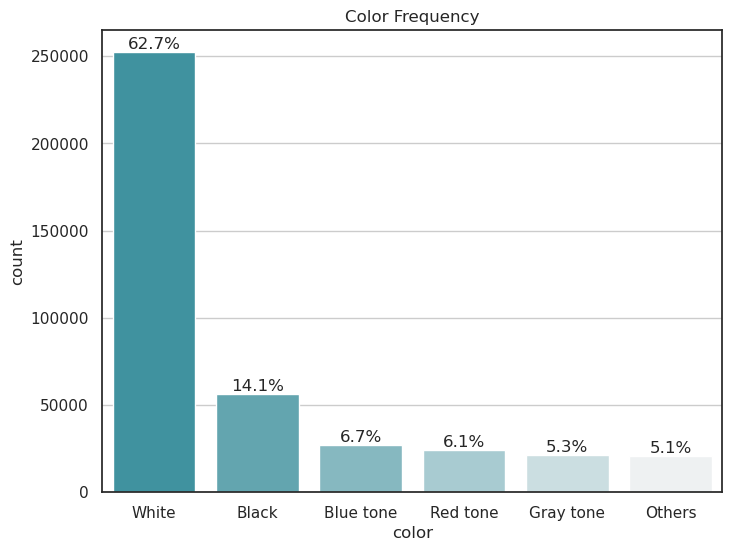

/tmp/ipykernel_969469/767675166.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="car_size", data=damage_df, order=damage_df.car_size.value_counts().index, palette=cm)
/tmp/ipykernel_969469/767675166.py:29: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.countplot(x="car_size", data=damage_df, order=damage_df.car_size.value_counts().index, palette=cm)


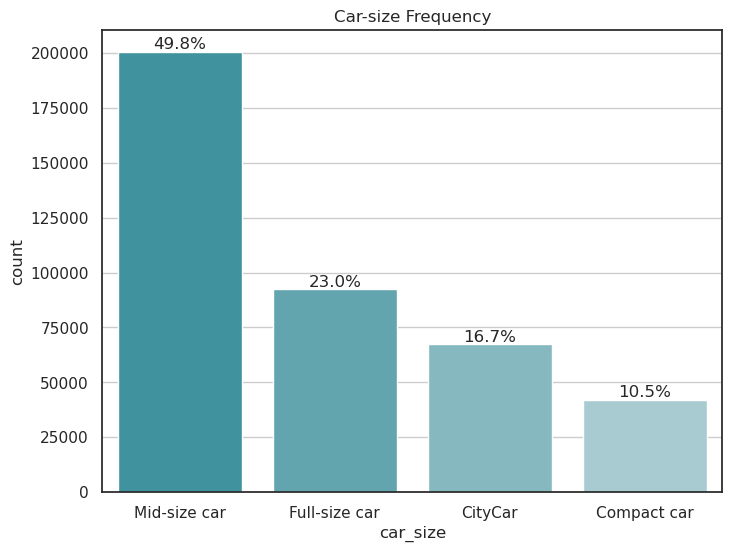

In [210]:
import seaborn as sns

cm = sns.color_palette('hls', 10)
cm = sns.light_palette((210, 90, 60), input="husl", reverse=True)

# 색상별 - 기본
# sns.countplot(x="color", data=damage_df, palette=cm)
# plt.title("Color Frequency")
# plt.show()

# 색상별 - with percentage and ordering
ax = sns.countplot(x="color", data=damage_df, order=damage_df.color.value_counts().index, palette=cm)
ax.set(ylabel="count", title="Color Frequency")
ax.yaxis.grid()

# add annotations
for c in ax.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/damage_df.color.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

# 차량 크기별
# sns.countplot(x="car_size", data=damage_df, palette=cm)
# plt.title("Car-size Frequency")
# plt.show()

ax = sns.countplot(x="car_size", data=damage_df, order=damage_df.car_size.value_counts().index, palette=cm)
ax.set(ylabel="count", title="Car-size Frequency")
ax.yaxis.grid()

# add annotations
for c in ax.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/damage_df.car_size.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

In [6]:
# 사진당 annotation 수
damage_df['total_anns'].describe()

count    402143.000000
mean          3.065671
std           2.378087
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          63.000000
Name: total_anns, dtype: float64

In [55]:
columns=["Scratched", "Breakage", "Separated", "Crushed"]
df = damage_df[columns].sum().sort_values(ascending=False)
df

Scratched    807637.0
Separated    181359.0
Crushed      128809.0
Breakage     115033.0
dtype: float64

In [57]:
df.sum()

1232838.0

/tmp/ipykernel_969469/165322480.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True))
/tmp/ipykernel_969469/165322480.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.barplot(data=df, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True))


TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

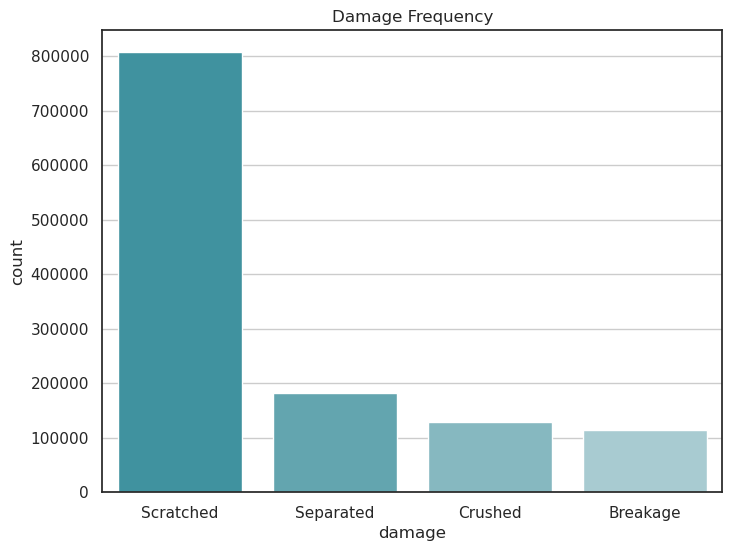

In [233]:
ax = sns.barplot(data=df, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True))
ax.set(xlabel="damage", ylabel="count", title="Damage Frequency")
ax.yaxis.grid()

# add annotations
for c in ax.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df.sum()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()


In [ ]:
# columns=["Scratched", "Breakage", "Separated", "Crushed"]
# df = damage_df[columns]
# sns.boxplot(data=df, palette=cm)

In [226]:
parts=['Front bumper','Front fender(L)','Front fender(R)','Head lights(L)','Head lights(R)',
       'Rear bumper','Rear fender(L)','Rear fender(R)','Rear lamp(L)','Rear lamp(R)',
       'Front door(L)','Front door(R)','Rear door(L)','Rear door(R)','Side mirror(L)','Side mirror(R)','Rocker panel(L)','Rocker panel(R)',
       'Front Wheel(L)','Front Wheel(R)','Rear Wheel(L)','Rear Wheel(R)',
       'Bonnet','Windshield','Roof','Trunk lid','A pillar(L)','A pillar(R)','C pillar(L)','C pillar(R)','Rear windshield','Undercarriage']
part_counts = [0] * len(parts)

for j, row in damage_df.iterrows():
    for i, p in enumerate(parts):
        if p in row['repair']:
            part_counts[i] += 1

part_counts


[214583,
 36449,
 36297,
 4104,
 5526,
 126531,
 44561,
 62549,
 2230,
 2967,
 24200,
 27024,
 41184,
 72466,
 2668,
 2678,
 4839,
 5983,
 18874,
 24245,
 11667,
 12573,
 12844,
 673,
 3016,
 11407,
 4865,
 4982,
 768,
 645,
 20,
 20]

In [227]:
len(part_counts)
big_part_counts = [sum(part_counts[:5]), sum(part_counts[5:10]), sum(part_counts[10:18]), sum(part_counts[18:22]), sum(part_counts[22:])]
big_part_counts, sum(big_part_counts), sum(part_counts)

([296959, 238838, 181042, 67359, 39240], 823438, 823438)

/tmp/ipykernel_969469/4167627384.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=big_part_counts, palette=cm)
/tmp/ipykernel_969469/4167627384.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(data=big_part_counts, palette=cm)
/tmp/ipykernel_969469/4167627384.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, rotation=45)


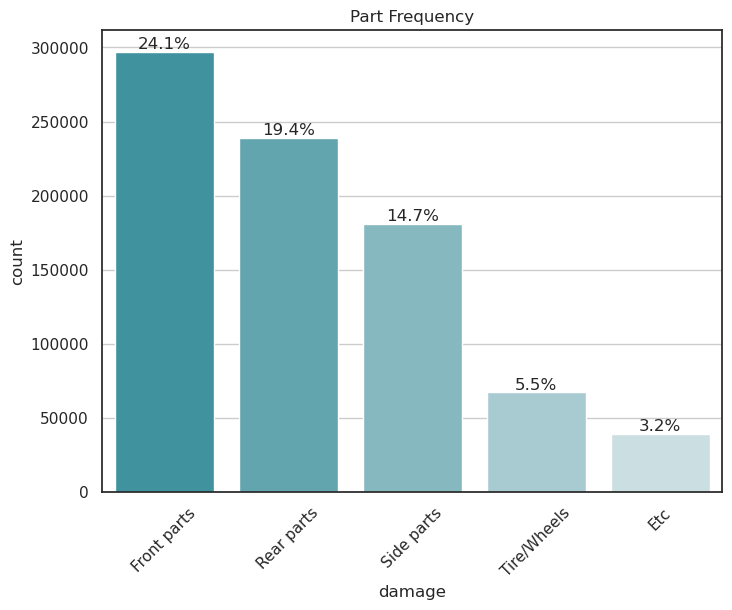

In [229]:
ax = sns.barplot(data=big_part_counts, palette=cm)
ax.set(xlabel="damage", ylabel="count", title="Part Frequency")
ax.yaxis.grid()

x_ticks = ["Front parts", "Rear parts", "Side parts","Tire/Wheels","Etc"]
ax.set_xticklabels(x_ticks, rotation=45)

# add annotations
for c in ax.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df.sum()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

In [89]:
width_range = []
wid_0 = damage_df['image_width'][damage_df['image_width'] <= 800].count()
wid_1 = damage_df['image_width'][damage_df['image_width'] <= 900].count() - wid_0
wid_2 = damage_df['image_width'][damage_df['image_width'] <= 1000].count() - wid_1 - wid_0
wid_3 = damage_df['image_width'][damage_df['image_width'] <= 1100].count() - wid_2 - wid_1 - wid_0
wid_4 = damage_df['image_width'][damage_df['image_width'] <= 1200].count() - wid_3 - wid_2 - wid_1 - wid_0
wid_5 = damage_df['image_width'][damage_df['image_width'] <= 1300].count() - wid_4 - wid_3 - wid_2 - wid_1 - wid_0
wid_6 = damage_df['image_width'][damage_df['image_width'] > 1300].count()
width_range = [wid_0, wid_1, wid_2, wid_3, wid_4, wid_5, wid_6]
width_range

[354686, 694, 13272, 13205, 644, 19575, 67]

/tmp/ipykernel_969469/677561082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=width_range, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True), ax=ax1)
/tmp/ipykernel_969469/677561082.py:7: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.barplot(data=width_range, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True), ax=ax1)
/tmp/ipykernel_969469/677561082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=width_range, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True), ax=ax2)
/tmp/ipykernel_969469/677561082.py:8: UserWar

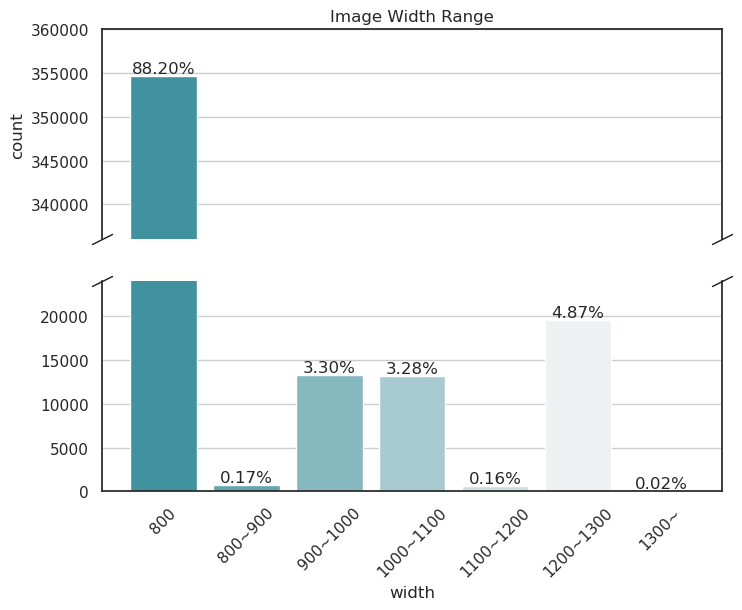

In [208]:
# 기본 plot
# ax = sns.barplot(data=width_range, palette=cm)

# y축 일부 생략된 plot
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)

ax1 = sns.barplot(data=width_range, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True), ax=ax1)
ax2 = sns.barplot(data=width_range, palette=sns.light_palette((210, 90, 60), input="husl", reverse=True), ax=ax2)

d = .5    # how big to make the diagonal lines in axes coordinates
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.set(ylabel="count", title="Image Width Range")
ax2.set(xlabel="width")

ax1.yaxis.grid()
ax2.yaxis.grid()

ax1.set_ylim(336000, 360000)
ax2.set_ylim(0, 24000)

ax1.set_yticks([340000, 345000, 350000, 355000, 360000])
ax2.set_yticks([0, 5000, 10000, 15000, 20000])

x_ticks = ["800", "800~900", "900~1000","1000~1100","1100~1200", "1200~1300", "1300~"]
ax2.set_xticklabels(x_ticks, rotation=45)

# add annotations
for c in ax1.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/sum(width_range)*100:0.2f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax1.bar_label(c, labels=labels, label_type='edge')
    ax2.bar_label(c, labels=labels, label_type='edge')

plt.show()

In [81]:
height_range = []
hei_0 = damage_df['image_height'][damage_df['image_height'] <= 600].count()
hei_1 = damage_df['image_height'][damage_df['image_height'] <= 700].count() - hei_0
hei_2 = damage_df['image_height'][damage_df['image_height'] <= 800].count() - hei_1 - hei_0
hei_3 = damage_df['image_height'][damage_df['image_height'] <= 900].count() - hei_2 - hei_1 - hei_0
hei_4 = damage_df['image_height'][damage_df['image_height'] <= 1000].count() - hei_3 - hei_2 - hei_1 - hei_0
hei_5 = damage_df['image_height'][damage_df['image_height'] <= 1100].count() - hei_4 - hei_3 - hei_2 - hei_1 - hei_0
hei_6 = damage_df['image_height'][damage_df['image_height'] > 1100].count()
height_range = [hei_0, hei_1, hei_2, hei_3, hei_4, hei_5, hei_6]
height_range

[343701, 3233, 22796, 2109, 12664, 12024, 5616]

/tmp/ipykernel_969469/2503818416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=height_range, palette=cm, ax=ax1)
/tmp/ipykernel_969469/2503818416.py:4: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.barplot(data=height_range, palette=cm, ax=ax1)
/tmp/ipykernel_969469/2503818416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=height_range, palette=cm, ax=ax2)
/tmp/ipykernel_969469/2503818416.py:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.barplot(data=height_range, palette=

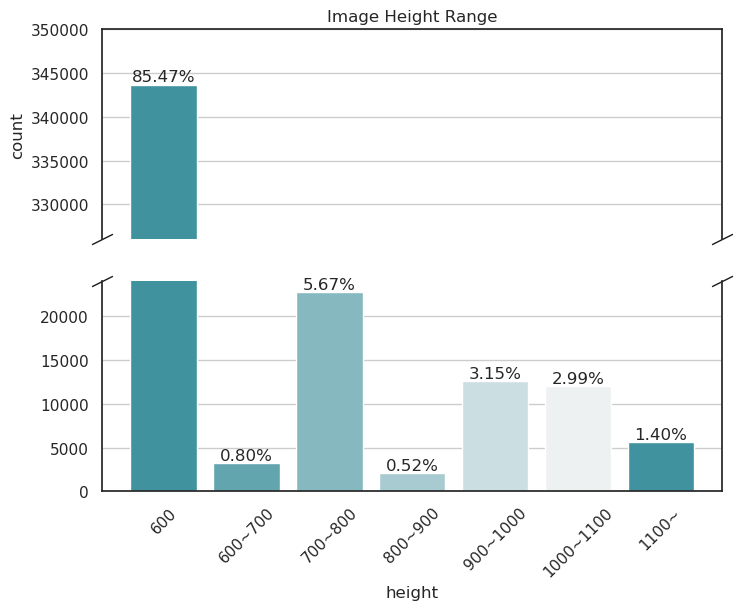

In [211]:
# y축 일부 생략된 plot
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)

ax1 = sns.barplot(data=height_range, palette=cm, ax=ax1)
ax2 = sns.barplot(data=height_range, palette=cm, ax=ax2)

d = .5    # how big to make the diagonal lines in axes coordinates
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.set(ylabel="count", title="Image Height Range")
ax2.set(xlabel="height")

ax1.yaxis.grid()
ax2.yaxis.grid()

ax1.set_ylim(326000, 345000)
ax2.set_ylim(0, 24000)

ax1.set_yticks([330000, 335000, 340000, 345000, 350000])
ax2.set_yticks([0, 5000, 10000, 15000, 20000])

x_ticks = ["600", "600~700", "700~800","800~900","900~1000", "1000~1100", "1100~"]
ax2.set_xticklabels(x_ticks, rotation=45)

# add annotations
for c in ax1.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/sum(height_range)*100:0.2f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax1.bar_label(c, labels=labels, label_type='edge')
    ax2.bar_label(c, labels=labels, label_type='edge')

plt.show()

## 테스트 데이터 구성

In [186]:
# 테스트 데이터 중 Bing AI까지 실행해 볼 30개 이미지 샘플링
df_test = damage_df.loc[damage_df[(damage_df['dataset'] == 'test') & (damage_df['image_width'] == 800) & (damage_df['image_height'] == 600)].index.to_series().sample(n=50).index]
df_test

index  Breakage  Crushed  Separated  Scratched  \
179114   0147210_sc-174470.jpg       0.0      0.0        0.0        1.0   
43751    0151260_sc-103275.jpg       0.0      0.0        1.0        0.0   
308158  0307851_as-0095064.jpg       0.0      1.0        0.0        1.0   
166162  0080394_as-0049770.jpg       0.0      1.0        1.0        1.0   
259535   0036382_sc-173603.jpg       0.0      0.0        1.0        1.0   
398467   0088221_sc-129980.jpg       0.0      0.0        0.0        1.0   
87867   0387889_sc-1009008.jpg       0.0      0.0        0.0        1.0   
13125   0124481_sc-1037262.jpg       0.0      2.0        2.0        4.0   
265120  0383835_as-0016434.jpg       0.0      0.0        0.0        4.0   
361291   0327162_sc-164810.jpg       0.0      0.0        0.0        1.0   
65180   0160232_as-0032679.jpg       1.0      0.0        0.0        5.0   
132934  0162446_sc-1010818.jpg       0.0      0.0        1.0        0.0   
169051  0458783_as-0092809.jpg       0.0      1.0        1.0        5.0   
395197  0306944_as-0059826.jpg       0.0      0.0        0.0        1.0   
190926  0127348_as-0002697.jpg       0.0      1.0        1.0        3.0   
171603  0447489_as-2872563.jpg       0.0      0.0        1.0        2.0   
163167   0097893_sc-104547.jpg       1.0      0.0        0.0        0.0   
15005   0362041_sc-1017049.jpg       0.0      5.0        3.0        4.0   
90438   0048783_as-0058081.jpg       0.0      1.0        1.0        1.0   
16615   0495934_as-2666561.jpg       0.0      0.0        0.0        1.0   
393734   0188255_sc-163540.jpg       0.0      0.0        1.0        2.0   
384381  0071337_sc-1022413.jpg       0.0      0.0        0.0        1.0   
31677   0281177_as-2737299.jpg       0.0      1.0        1.0        1.0   
156819  0313534_as-0031683.jpg       2.0      0.0        4.0        0.0   
288132   0045796_sc-110834.jpg       0.0      1.0        0.0        1.0   
73899    0117771_sc-146214.jpg       0.0      0.0        0.0        2.0   
264478  0432519_as-0070574.jpg       0.0      0.0        0.0        2.0   
365321   0126050_sc-192689.jpg       0.0      1.0        0.0        3.0   
20948    0039121_sc-225326.jpg       0.0      0.0        0.0        1.0   
93245   0035715_as-3170324.jpg       0.0      0.0        0.0        1.0   
59403    0273208_sc-189486.jpg       0.0      1.0        1.0        2.0   
118376   0056126_sc-224010.jpg       0.0      0.0        0.0        1.0   
277710  0398409_sc-1029527.jpg       0.0      0.0        0.0        3.0   
401749  0340610_as-2618836.jpg       0.0      0.0        0.0        1.0   
300515   0149571_sc-218096.jpg       1.0      0.0        0.0        1.0   
2394    0387329_as-0039160.jpg       1.0      2.0        0.0        2.0   
219939   0141271_sc-146042.jpg       0.0      0.0        0.0        4.0   
383676   0029253_sc-224815.jpg       0.0      1.0        1.0        2.0   
87381    0004868_sc-180047.jpg       1.0      0.0        0.0        0.0   
45381    0115504_sc-205525.jpg       0.0      1.0        0.0        1.0   
41732   0158176_as-0090094.jpg       1.0      0.0        1.0        5.0   
320430   0326955_sc-118378.jpg       0.0      1.0        1.0        3.0   
82666   0227825_as-0082773.jpg       1.0      0.0        0.0        5.0   
278323   0263194_sc-108362.jpg       0.0      0.0        0.0        1.0   
198435  0138720_sc-1027421.jpg       0.0      2.0        0.0        2.0   
183685  0184250_as-0070391.jpg       0.0      0.0        0.0        3.0   
21141   0272481_as-2790249.jpg       1.0      0.0        1.0        2.0   
370344   0080211_sc-204553.jpg       2.0      0.0        0.0        1.0   
121397  0308756_sc-1033913.jpg       0.0      0.0        0.0        3.0   
6557    0360338_as-2542725.jpg       0.0      1.0        0.0        6.0   

        total_anns  image_width  image_height       car_size      color  \
179114         1.0          800           600  Full-size car      White   
43751          1.0          800           600   M

In [187]:
# 샘플링된 50개 이미지의 label 불러오기
test_imgs = df_test['index'].to_list()
test_labels = []
for img in test_imgs:
    with open(os.path.join(root_dir, 'data/Dataset/2.라벨링데이터/damage', img.replace('jpg', 'json'))) as f:
        label = json.load(f)
    test_labels.append(label)


In [188]:
# damage 별로 dataframe 구성
df_test_labels = pd.json_normalize(test_labels, record_path=['annotations'], record_prefix='annotations.', meta=[
    ['info', 'name'],
    ['info', 'date_created'],
    ['images', 'width'],
    ['images', 'height'],
    ['images', 'file_name'],
    ['categories', 'supercategory_name'],
])
df_test_labels

annotations.id  annotations.image_id annotations.category_id  \
0                 2                     1               sc-174470   
1                 2                     1               sc-103275   
2                 2                     1              as-0095064   
3                 3                     1              as-0095064   
4                 2                     1              as-0049770   
..              ...                   ...                     ...   
154               4                     1              as-2542725   
155               5                     1              as-2542725   
156               6                     1              as-2542725   
157               7                     1              as-2542725   
158               8                     1              as-2542725   

                              annotations.segmentation  annotations.area  \
0    [[[[145, 74], [180, 88], [233, 160], [409, 275...           91720.0   
1    [[[[340, 260], [407, 234], [617, 261], [783, 2...            8228.0   
2    [[[[191, 422], [385, 331], [410, 332], [426, 2...           51190.0   
3    [[[[393, 224], [474, 151], [514, 38], [674, 10...           92310.0   
4    [[[[97, 600], [0, 207], [12, 201], [141, 264],...           44124.0   
..                                                 ...               ...   
154  [[[[380, 177], [411, 183], [408, 212], [394, 2...            1089.5   
155  [[[[433, 183], [466, 188], [455, 224], [435, 2...            1643.5   
156  [[[[23, 43], [70, 34], [107, 38], [128, 44], [...            7610.5   
157  [[[[0, 176], [53, 179], [43, 206], [40, 225], ...            2164.0   
158  [[[[552, 306], [522, 283], [518, 277], [524, 2...            4649.5   

        annotations.bbox annotations.damage annotations.part  \
0    [145, 74, 498, 526]          Scratched             None   
1    [340, 234, 460, 88]          Separated             None   
2    [191, 89, 535, 333]          Scratched             None   
3    [214, 10, 486, 483]            Crushed             None   
4     [0, 201, 183, 399]            Crushed             None   
..                   ...                ...              ...   
154   [378, 177, 33, 43]          Scratched             None   
155   [419, 183, 47, 56]          Scratched             None   
156     [0, 34, 128, 84]          Scratched             None   
157     [0, 176, 53, 49]          Scratched             None   
158  [518, 264, 80, 119]          Scratched             None   

     annotations.year annotations.color annotations.level  \
0                2016             White              None   
1                2016             White              None   
2                2014             Black              None   
3                2014             Black              None   
4                2016             White              None   
..                ...               ...               ...   
154              2017            Others              None   
155              2017            Others              None   
156              2017            Others              None   
157              2017            Others              None   
158              2017            Others              None   

                                    annotations.repair info.name  \
0            [Front bumper:repair,coating,sheet_metal]     socar   
1                      [Front bumper:coating,exchange]     socar   
2    [B pillar(L):sheet_metal, Rear fender(L):coati...  external   
3    [B pillar(L):sheet_metal, Rear fender(L):coati...  external   
4    [Front fender(R):sheet_metal,coating,exchange,...  external   
..                                                 ...       ...   
154  [Front door(L):sheet_metal,coating, Rear door(...  external   
155  [Front door(L):sheet_metal,coating, Rear door(...  external   
156  [Front door(L):sheet_metal,coating, Rear door(...  external   
157  [Front door(L):sheet_metal,coating, Rear door(...  external   
158  [Front d

In [191]:
# annotation 영역이 큰 20개만 추리기
df_test_final = df_test_labels.sort_values(by=['annotations.area'], ascending=False).head(20)
df_test_final

annotations.id  annotations.image_id annotations.category_id  \
63                1                     1              as-2666561   
9                 2                     1               sc-129980   
17                8                     1              sc-1037262   
89                2                     1               sc-189486   
90                3                     1               sc-189486   
3                 3                     1              as-0095064   
6                 4                     1              as-0049770   
0                 2                     1               sc-174470   
142               1                     1              as-2790249   
144               3                     1              as-2790249   
7                 2                     1               sc-173603   
60                2                     1              as-0058081   
50                4                     1              sc-1017049   
99                3                     1               sc-218096   
2                 2                     1              as-0095064   
4                 2                     1              as-0049770   
26                4                     1              as-0032679   
61                3                     1              as-0058081   
113               2                     1               sc-180047   
134               2                     1               sc-108362   

                              annotations.segmentation  annotations.area  \
63   [[[[798, 32], [793, 296], [728, 443], [630, 49...          286636.5   
9    [[[[0, 221], [6, 76], [132, 64], [785, 138], [...          218958.5   
17   [[[[579, 174], [589, 194], [507, 329], [506, 4...          132616.5   
89   [[[[314, 324], [410, 215], [552, 187], [767, 2...          120882.5   
90   [[[[11, 196], [10, 176], [82, 223], [197, 296]...           99105.5   
3    [[[[393, 224], [474, 151], [514, 38], [674, 10...           92310.0   
6    [[[[311, 205], [348, 195], [414, 153], [458, 1...           92035.0   
0    [[[[145, 74], [180, 88], [233, 160], [409, 275...           91720.0   
142  [[[[3, 102], [136, 232], [312, 207], [336, 159...           83296.5   
144  [[[[60, 344], [97, 350], [170, 440], [274, 488...           75319.0   
7    [[[[410, 267], [434, 289], [300, 341], [376, 3...           66195.0   
60   [[[[81, 221], [106, 168], [168, 123], [242, 57...           60036.0   
50   [[[[20, 178], [86, 159], [296, 142], [408, 203...           54405.5   
99   [[[[315, 185], [586, 240], [766, 163], [769, 1...           52266.5   
2    [[[[191, 422], [385, 331], [410, 332], [426, 2...           51190.0   
4    [[[[97, 600], [0, 207], [12, 201], [141, 264],...           44124.0   
26   [[[[75, 134], [87, 127], [125, 119], [143, 137...           41466.5   
61   [[[[275, 0], [506, 0], [519, 59], [451, 185], ...           41322.0   
113  [[[[198, 324], [347, 319], [446, 498], [578, 5...           40001.0   
134  [[[[139, 346], [179, 342], [345, 409], [358, 4...           37345.0   

         annotations.bbox annotations.damage annotations.part  \
63     [169, 6, 629, 589]          Scratched             None   
9       [0, 64, 789, 348]          Scratched             None   
17      [0, 47, 589, 487]            Crushed             None   
89   [259, 187, 531, 312]            Crushed             None   
90     [0, 176, 798, 312]          Scratched             None   
3     [214, 10, 486, 483]            Crushed             None   
6      [0, 141, 505, 459]          Scratched             None   
0     [145, 74, 498, 526]          Scratched             None   
142    [3, 102, 569, 360]          Scratched             None   
144    [0, 333, 625, 265]          Scratched             None   
7      [0, 267, 625, 333]          Scratched             None   
60     [81, 47, 473, 339]          Scratched             None   
50    [20, 142, 394, 221]            Crushed             None   
99   [311, 163, 489, 190]          Scratched    

In [192]:
# 20개 이미지 파일을 하나의 폴더에 저장해 다운로드
import shutil

llm_dataset_dirname = 'data/dataset_llm'
os.makedirs(os.path.join(root_dir, llm_dataset_dirname), exist_ok=True)

if os.path.exists(os.path.join(root_dir, llm_dataset_dirname, 'image')):
    shutil.rmtree(os.path.join(root_dir, llm_dataset_dirname, 'image'))
os.makedirs(os.path.join(root_dir, llm_dataset_dirname, 'image'))

final_imgs = []
for img in test_imgs:
    if img in df_test_final['images.file_name'].values.tolist():
        final_imgs.append(img)
        shutil.copy(os.path.join(root_dir, f'data/Dataset/1.원천데이터/damage/{img}'), os.path.join(root_dir, llm_dataset_dirname, f'image/{img}'))

# if os.path.exists(os.path.join(root_dir, llm_dataset_dirname, 'llm_result')):
#     shutil.rmtree(os.path.join(root_dir, llm_dataset_dirname, 'llm_result'))
os.makedirs(os.path.join(root_dir, llm_dataset_dirname, 'llm_result'), exist_ok=True)

for img in final_imgs:
    with open(os.path.join(root_dir, llm_dataset_dirname, 'llm_result', img.replace('jpg', 'txt')), 'w') as f:
        f.write('')
df_test_final.to_csv(os.path.join(root_dir, llm_dataset_dirname, 'test_dataset.csv'))

In [184]:
damage_df



index  Breakage  Crushed  Separated  Scratched  \
0        0125554_sc-146571.jpg       0.0      0.0        0.0        2.0   
1       0414284_sc-1024967.jpg       0.0      0.0        0.0        5.0   
2       0304203_as-2614893.jpg       0.0      0.0        0.0        1.0   
3       0212865_as-3046144.jpg       0.0      0.0        0.0        1.0   
4       0006585_as-0056695.jpg       0.0      1.0        1.0        2.0   
...                        ...       ...      ...        ...        ...   
402138   0060406_sc-198236.jpg       0.0      0.0        0.0        1.0   
402139   0492332_sc-205839.jpg       0.0      1.0        0.0        3.0   
402140  0027449_as-0063574.jpg       0.0      0.0        0.0        4.0   
402141  0244117_sc-1006257.jpg       0.0      0.0        1.0        2.0   
402142  0428771_as-0055898.jpg       0.0      0.0        0.0        1.0   

        total_anns  image_width  image_height       car_size      color  \
0              2.0         1280           720   Mid-size car      White   
1              5.0          800           600   Mid-size car      White   
2              1.0          800           600        CityCar  Blue tone   
3              1.0          800           600  Full-size car  Blue tone   
4              4.0          800           600  Full-size car     Others   
...            ...          ...           ...            ...        ...   
402138         1.0          800           600  Full-size car      White   
402139         4.0          800           600   Mid-size car      White   
402140         4.0         1280           960   Mid-size car      White   
402141         3.0          800           600        CityCar      White   
402142         1.0          800           600   Mid-size car      Black   

                                                   repair  year dataset  
0                        ['Rear bumper:exchange,coating']  2016   train  
1       ['Rear bumper:coating,repair', 'Front bumper:r...  2018   train  
2                         ['Front bumper:repair,coating']  2018   train  
3       ['Rear fender(R):exchange', 'Rear fender(L):co...  2018   train  
4       ['Rear door(R):exchange,coating', 'Rear Wheel(...  2014   train  
...                                                   ...   ...     ...  
402138                                                 []  2016   train  
402139  ['Front bumper:coating,sheet_metal,exchange', ...  2019    test  
402140                    ['Front bumper:repair,coating']  2016   train  
402141                  ['Front bumper:coating,exchange']  2018   train  
402142  ['Front bumper:coating,exchange', 'Rear bumper...  2013     val  

[402143 rows x 13 columns]

In [ ]:
df_tmp = pd.read_csv(os.path.join(root_dir, 'data/datainfo/part/'))

# Old

In [3]:
damage_images = glob('./2.Validation/2.라벨링데이터/damage/*.json')
damage_part_images = glob('./2.Validation/2.라벨링데이터/damage_part/*.json')

In [4]:
damage_df = pd.DataFrame(columns=("index", "Scratched", "Breakage", "Separated", "Crushed", "width", "height", "total_anns", "ran_var", "dataset"))

In [5]:
def cls_damage(data):
    file_name = data['images']['file_name']
    damage_dict = {"index": file_name, "Scratched" : 0, "Breakage" : 0, "Separated" : 0, "Crushed" : 0, "width" : 0, "height" : 0,"dataset" : ""}
    _sum = 0
    for i in range(len(data['annotations'])):
        damage_type = data['annotations'][i]['damage']
        damage_dict['width'] = data['images']['width']
        damage_dict['height'] = data['images']['height']
        damage_dict[damage_type] += 1
        _sum += 1
    damage_dict["total_anns"] = _sum
    return damage_dict

In [ ]:
for i in tqdm(range(len(damage_images))):
    img = damage_images[i][2:]
    
    with open(f'./{img}', 'r') as f:
        data = json.load(f)
    damage_dict = cls_damage(data)
    
    if(1 <= i % 10 < 8):
        damage_dict['dataset'] = 'train'
    elif(i % 10 == 8 or i % 10 == 9):
        damage_dict['dataset'] = 'val'
    else:
        damage_dict['dataset'] = 'test'
    
    damage_df.loc[i] = damage_dict
damage_df.loc["총합", :] = damage_df.sum(axis = 0, numeric_only = True)

 82%|█████████████████████████████████████████████████████████████▊             | 41602/50445 [01:56<00:36, 243.35it/s]

In [8]:
# dfframe셀 실수 -> 정수변경
damage_df = damage_df.astype({'Scratched' : 'int', 'Breakage' : 'int', 'Separated' : 'int', 'Crushed' : 'int', 'width' : 'int', 'height' : 'int', "total_anns" : 'int'})

In [11]:
damage_df.head(5)

index  Scratched  Breakage  Separated  Crushed  width  \
0  0506233_sc-202337.jpg          0         1          1        0    800   
1  0506234_sc-202337.jpg          0         0          3        0    800   
2  0506235_sc-202337.jpg          1         0          2        0    800   
3  0506236_sc-202337.jpg          1         0          1        0    800   
4  0506237_sc-202337.jpg          2         0          1        0    800   

   height  total_anns  ran_var dataset  
0     600           2      NaN    test  
1     600           3      NaN   train  
2     600           3      NaN   train  
3     600           2      NaN   train  
4     600           3      NaN   train

## 데이터 width, height의 분포

In [60]:
damage_df['image_width'][damage_df['image_width'] >= 1200].describe(), damage_df['image_height'].describe()

(count    19705.000000
 mean      1277.512053
 std         16.023505
 min       1200.000000
 25%       1280.000000
 50%       1280.000000
 75%       1280.000000
 max       2110.000000
 Name: image_width, dtype: float64,
 count    402143.000000
 mean        644.866873
 std         132.924682
 min         600.000000
 25%         600.000000
 50%         600.000000
 75%         600.000000
 max        1778.000000
 Name: image_height, dtype: float64)

In [61]:
width_range = []
wid_0 = damage_df['image_width'][damage_df['image_width'] <= 800].count()
wid_1 = damage_df['image_width'][damage_df['image_width'] <= 900].count() - wid_0
wid_2 = damage_df['image_width'][damage_df['image_width'] <= 1000].count() - wid_1 - wid_0
wid_3 = damage_df['image_width'][damage_df['image_width'] <= 1100].count() - wid_2 - wid_1 - wid_0
wid_4 = damage_df['image_width'][damage_df['image_width'] <= 1200].count() - wid_3 - wid_2 - wid_1 - wid_0
wid_5 = damage_df['image_width'][damage_df['image_width'] <= 1300].count() - wid_4 - wid_3 - wid_2 - wid_1 - wid_0
wid_6 = damage_df['image_width'][damage_df['image_width'] > 1300].count()
width_range = [wid_0, wid_1, wid_2, wid_3, wid_4, wid_5, wid_6]
# width_range = [wid_1, wid_2, wid_3, wid_4, wid_5]

## 이미지 Width

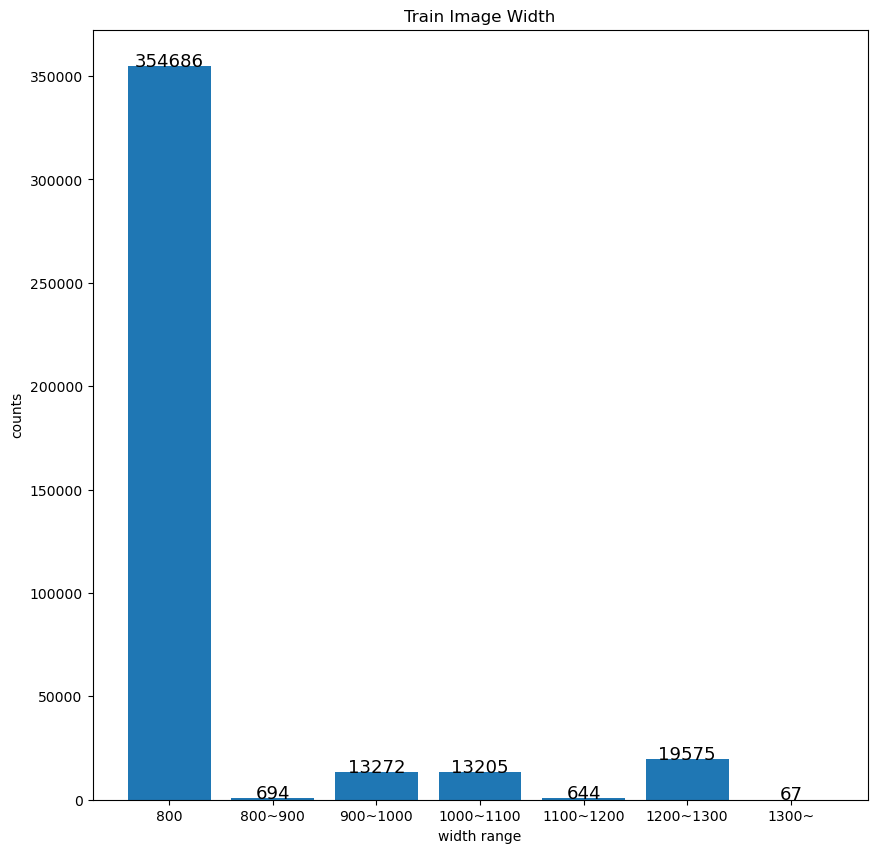

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

plt.title("Train Image Width")
plt.xlabel("width range")
plt.ylabel("counts")
x_bar = ["800", "800~900", "900~1000","1000~1100","1100~1200", "1200~1300", "1300~"]

xtick_label_position = list(range(len(x_bar))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x_bar) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, width_range)

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100, \
            width_range[i],ha='center',fontsize=13)

plt.show()

In [64]:
height_range = []
hei_0 = damage_df['image_height'][damage_df['image_height'] <= 600].count()
hei_1 = damage_df['image_height'][damage_df['image_height'] <= 700].count() - hei_0
hei_2 = damage_df['image_height'][damage_df['image_height'] <= 800].count() - hei_1 - hei_0
hei_3 = damage_df['image_height'][damage_df['image_height'] <= 900].count() - hei_2 - hei_1 - hei_0
hei_4 = damage_df['image_height'][damage_df['image_height'] <= 1000].count() - hei_3 - hei_2 - hei_1 - hei_0
hei_5 = damage_df['image_height'][damage_df['image_height'] <= 1100].count() - hei_4 - hei_3 - hei_2 - hei_1 - hei_0
hei_6 = damage_df['image_height'][damage_df['image_height'] > 1100].count()
height_range = [hei_0, hei_1, hei_2, hei_3, hei_4, hei_5, hei_6]

## 이미지 height

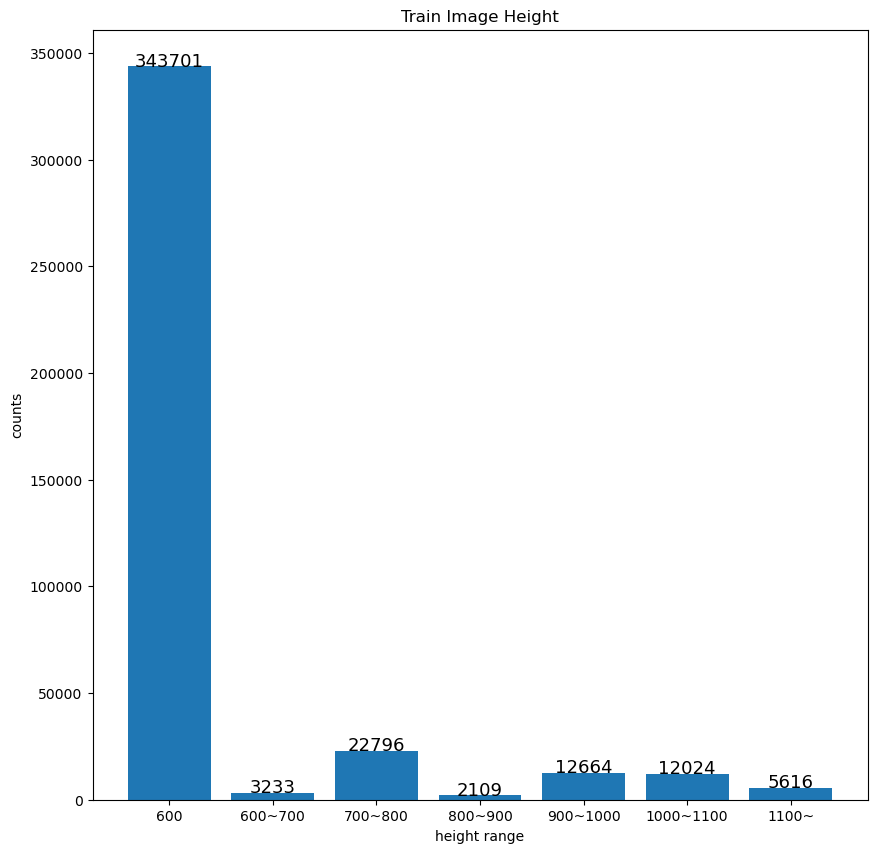

In [66]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

plt.title("Train Image Height")
plt.xlabel("height range")
plt.ylabel("counts")
x_bar = ["600", "600~700","700~800","800~900","900~1000","1000~1100","1100~"]
xtick_label_position = list(range(len(x_bar))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x_bar) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, height_range)

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100, \
            height_range[i],ha='center',fontsize=13)
plt.show()

## Damage class 별 갯수

<Axes: >

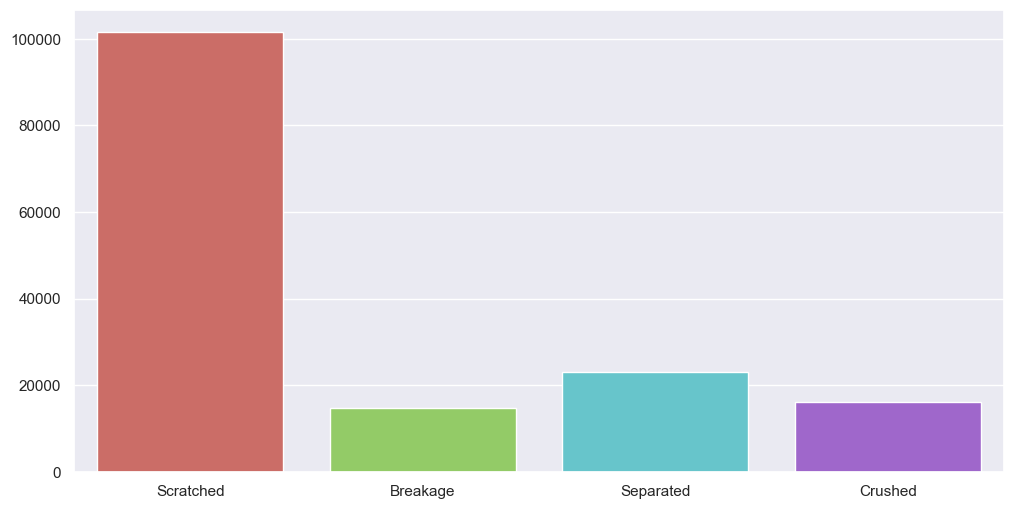

In [44]:
sns.set(rc = {'figure.figsize':(12,6)})

cm = sns.color_palette('hls', 4)
sns.barplot(
  x = ['Scratched', 'Breakage', 'Separated', 'Crushed'],
  y = [x for x in damage_df.loc["총합"][1:5]], 
  palette=cm
)